### Feature Engineering and Data preparations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

np.set_printoptions(suppress=True)

sns.set()
sns.set_style('whitegrid')

data = pd.read_csv('TRAIN.csv')
data = data.rename(columns=lambda x: x.strip())

In [2]:
data['Consistent competitor'] = (data['Most Loved Competitor network in in Month 1'
                                    ] == data['Most Loved Competitor network in in Month 2']).astype(int)
# if the competitor in month 1 and month 2 are the same, it gives a 1

data['Network Upgrade'] = 0

data.loc[(data['Network type subscription in Month 1'] == '2G') & 
              (data['Network type subscription in Month 2'] == '3G'), 'Network Upgrade'] = 1

data.loc[(data['Network type subscription in Month 1'] == '3G') & 
              (data['Network type subscription in Month 2'] == '2G'), 'Network Upgrade'] = -1
# if there is an upgrade in network, +1, downgrade: -1, else, 0

In [3]:
selected_data = data.iloc[:,1:]
selected_data.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Consistent competitor,Network Upgrade
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1401.000000,1401.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.500000,0.367595,0.014276
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,0.500179,0.482322,0.241594
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,-1.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,0.000000,0.000000,0.000000
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,0.500000,0.000000,0.000000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000,1.000000,0.000000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000,1.000000,1.000000


In [4]:
selected_data[selected_data['network_age'] < 0]

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Consistent competitor,Network Upgrade
490,-5.0,-0.17,857.1008,63.47,190.03,1.565901e+06,204.0,716.0,1240.0,1.0,3G,3G,ToCall,ToCall,1.0,1,0
916,-4.0,-0.13,2898.8240,25.10,1.25,3.058533e+05,642.0,0.0,82221.0,1.0,3G,3G,Mango,Weematel,1.0,0,0
1163,-2.0,-0.07,130.5780,94.85,1.25,2.195300e+00,7.0,150.0,1121.0,1.0,Other,Other,Uxaa,Uxaa,1.0,1,0


Text(0.5,1,'Correlation matrix')

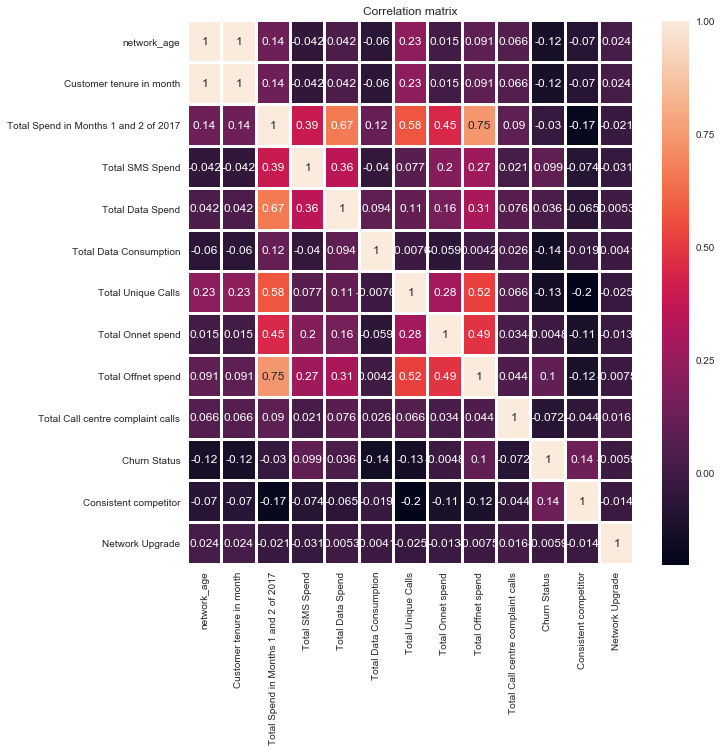

In [5]:
corr_matrix = selected_data.corr()
f, ax = plt.subplots(figsize=[10,10])
sns.heatmap(corr_matrix, linewidths=2, ax=ax, annot=True)    # annot parameter sets the values.
#as you can see in heatmap, longitude are latitude
ax.set_title('Correlation matrix')

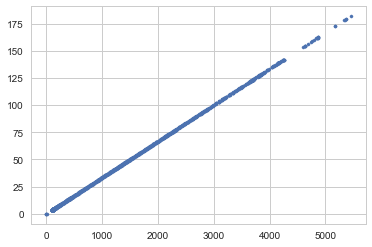

In [6]:
plt.scatter(x='network_age', y='Customer tenure in month', data=selected_data, s = 10)

In [7]:
selected_data.drop('network_age', inplace=True, axis=1)

Text(0,0.5,'Total Offnet spend')

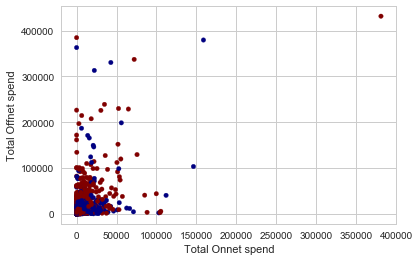

In [8]:
plt.scatter(x ='Total Onnet spend', y='Total Offnet spend', data = selected_data, s=20, c='Churn Status', cmap = 'jet')
plt.xlabel('Total Onnet spend')
plt.ylabel('Total Offnet spend')

Text(0,0.5,'Total Onnet spend')

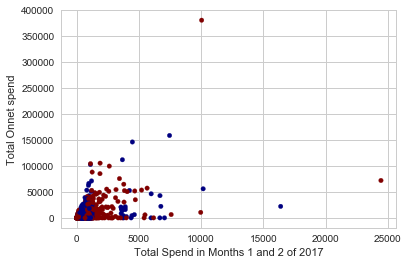

In [9]:
plt.scatter(x ='Total Spend in Months 1 and 2 of 2017', y='Total Onnet spend',data = selected_data, s=20, c='Churn Status', cmap = 'jet')
plt.xlabel('Total Spend in Months 1 and 2 of 2017')
plt.ylabel('Total Onnet spend')

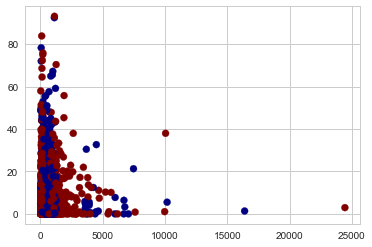

In [10]:
plt.scatter(selected_data['Total Spend in Months 1 and 2 of 2017'], 
            selected_data['Total Onnet spend']/selected_data['Total Spend in Months 1 and 2 of 2017'], c=selected_data['Churn Status'], cmap = 'jet')

In [11]:
network_month1_dummy = pd.get_dummies(selected_data['Network type subscription in Month 1'])
selected_data = selected_data.join(network_month1_dummy, rsuffix = "_1")
selected_data.drop('Network type subscription in Month 1', axis=1, inplace=True)

network_month2_dummy = pd.get_dummies(selected_data['Network type subscription in Month 2'])
selected_data = selected_data.join(network_month2_dummy, rsuffix = "_2")
selected_data.drop('Network type subscription in Month 2', axis=1, inplace=True)

competitor_month1_dummy = pd.get_dummies(selected_data['Most Loved Competitor network in in Month 1'])
selected_data = selected_data.join(competitor_month1_dummy, rsuffix = "_1")
selected_data.drop('Most Loved Competitor network in in Month 1', axis=1, inplace=True)

competitor_month2_dummy = pd.get_dummies(selected_data['Most Loved Competitor network in in Month 2'])
selected_data = selected_data.join(competitor_month2_dummy, rsuffix = "_2")
selected_data.drop('Most Loved Competitor network in in Month 2', axis=1, inplace=True)

In [12]:
selected_data['Churn Status'] = selected_data['Churn Status'].apply(lambda x: -1 if x==0 else 1)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

train_data, cv_data = train_test_split(selected_data, test_size=0.3, random_state=42)

In [14]:
train_x = train_data.drop('Churn Status', axis=1)
train_y = train_data['Churn Status']

cv_x = cv_data.drop('Churn Status', axis=1)
cv_y = cv_data['Churn Status']

In [15]:
train_x[train_x.isnull().any(axis=1)]

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_x.drop(1400, inplace=True)
train_y.drop(1400, inplace=True)

C:\Users\Tiwatope\Anaconda3\lib\site-packages\pandas\core\generic.py:2184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [17]:
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()
std_scaler.fit(train_x)

#\train_x_std = std_scaler.transform(train_x)
#cv_x_std = std_scaler.transform(cv_x)

train_x_std = train_x
cv_x_std = cv_x

In [18]:
selected_data.describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1401.000000,...,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.000714,...,0.144183,0.231263,0.099215,0.108494,0.072091,0.219843,0.045682,0.591720,0.036403,0.032834
std,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,1.000357,...,0.351400,0.421791,0.299057,0.311114,0.258731,0.414288,0.208868,0.491691,0.187357,0.178265
min,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
train_x.describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,979.000000,979.000000,979.000000,979.000000,9.790000e+02,979.000000,979.000000,979.000000,979.000000,979.000000,...,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,46.782768,811.632908,30.739224,61.001083,1.962731e+06,199.874362,6849.838611,16516.488253,1.918284,0.371808,...,0.147089,0.228805,0.086823,0.116445,0.075587,0.217569,0.046987,0.589377,0.034729,0.035751
std,42.207888,1337.616028,61.883403,329.445925,5.815473e+06,300.364771,17174.847328,38375.721709,2.440595,0.483535,...,0.354376,0.420278,0.281720,0.320922,0.264472,0.412804,0.211719,0.492198,0.183187,0.185763
min,-0.170000,11.682000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000,153.534400,3.500000,1.250000,1.056332e+03,18.000000,108.000000,1217.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.300000,594.418800,14.020000,10.000000,1.013477e+05,82.000000,1716.000000,4369.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,72.400000,1007.849600,30.565000,41.250000,1.074643e+06,249.000000,7618.000000,13367.500000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,181.700000,24438.830000,873.980000,8295.000000,5.535619e+07,2184.000000,381174.000000,431440.000000,49.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modelling and eveluation

In [20]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(train_x_std, train_y)
    
train_preds_lda = lda.predict(train_x_std)
cv_preds_lda = lda.predict(cv_x_std)

train_acc_lda = accuracy_score(train_preds_lda, train_y)
cv_acc_lda = accuracy_score(cv_preds_lda, cv_y)

C:\Users\Tiwatope\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [21]:
print("Training accuracy for linear discriminant analysis is ", train_acc_lda)
print("CV accuracy for linear discriminant analysis is ", cv_acc_lda)

Training accuracy for linear discriminant analysis is  0.722165474974
CV accuracy for linear discriminant analysis is  0.641330166271


In [22]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(train_x_std, train_y)
    
train_preds_qda = qda.predict(train_x_std)
cv_preds_qda = qda.predict(cv_x_std)

train_acc_qda = accuracy_score(train_preds_qda, train_y)
cv_acc_qda = accuracy_score(cv_preds_qda, cv_y)

C:\Users\Tiwatope\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [23]:
print("Training accuracy for Quadratic discriminant analysis is ", train_acc_qda)
print("CV accuracy for Quadratic discriminant analysis is ", cv_acc_qda)

Training accuracy for Quadratic discriminant analysis is  0.668028600613
CV accuracy for Quadratic discriminant analysis is  0.605700712589


In [24]:
logReg = linear_model.LogisticRegression(C=1)
logReg.fit(train_x_std, train_y)
#Value of C=1 was obtained after some tries

train_preds_lr = logReg.predict(train_x_std)
cv_preds_lr = logReg.predict(cv_x_std)

train_acc_lr = accuracy_score(train_preds_lr, train_y)
cv_acc_lr = accuracy_score(cv_preds_lr, cv_y)

In [25]:
print("Training accuracy for logistic regression is ", train_acc_lr)
print("CV accuracy for logistic regression is ", cv_acc_lr)

Training accuracy for logistic regression is  0.621041879469
CV accuracy for logistic regression is  0.593824228029


In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=3)
random_forest.fit(train_x_std, train_y)

train_preds_rf = random_forest.predict(train_x_std)
cv_preds_rf = random_forest.predict(cv_x_std)

train_acc_rf = accuracy_score(train_preds_rf, train_y)
cv_acc_rf = accuracy_score(cv_preds_rf, cv_y)

In [27]:
print("Training accuracy for Random Forest is ", train_acc_rf)
print("CV accuracy for Random Forest is ", cv_acc_rf)

Training accuracy for Random Forest is  0.996935648621
CV accuracy for Random Forest is  0.807600950119


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, algorithm='brute')

knn.fit(train_x_std, train_y)

train_preds_knn = knn.predict(train_x_std)
cv_preds_knn = knn.predict(cv_x_std)

train_acc_knn = accuracy_score(train_preds_knn, train_y)
cv_acc_knn = accuracy_score(cv_preds_knn, cv_y)

In [29]:
print("Training accuracy for knn is ", train_acc_knn)
print("CV accuracy for knn is ", cv_acc_knn)

Training accuracy for knn is  0.797752808989
CV accuracy for knn is  0.638954869359


In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=50)

ada_boost.fit(train_x_std, train_y)

train_preds_ada = ada_boost.predict(train_x_std)
cv_preds_ada = ada_boost.predict(cv_x_std)

train_acc_ada = accuracy_score(train_preds_ada, train_y)
cv_acc_ada = accuracy_score(cv_preds_ada, cv_y)

In [31]:
print("Training accuracy for ada boost is ", train_acc_ada)
print("CV accuracy for ada boost is ", cv_acc_ada)

Training accuracy for ada boost is  0.871297242084
CV accuracy for ada boost is  0.805225653207


## Load Data and test

In [32]:
test_data = pd.read_csv('TEST.csv')

test_data_ID = test_data['Customer ID']

test_data['Consistent competitor'] = (test_data['Most Loved Competitor network in in Month 1'
                                    ] == test_data['Most Loved Competitor network in in Month 2']).astype(int)
# if the competitor in month 1 and month 2 are the same, it gives a 1

test_data['Network Upgrade'] = 0

test_data.loc[(test_data['Network type subscription in Month 1'] == '2G') & 
              (test_data['Network type subscription in Month 2'] == '3G'), 'Network Upgrade'] = 1

test_data.loc[(test_data['Network type subscription in Month 1'] == '3G') & 
              (test_data['Network type subscription in Month 2'] == '2G'), 'Network Upgrade'] = -1
# if there is an upgrade in network, +1, downgrade: -1, else, 0




selected_test = test_data.drop(['network_age', 'Customer ID'], axis=1)
# drop network_age because of the correlation results obtained in training. It is also obtained in the test data two cells below

#run the same procedure to get dummy variables
tnetwork_month1_dummy = pd.get_dummies(selected_test['Network type subscription in Month 1'])
selected_test = selected_test.join(tnetwork_month1_dummy, rsuffix = "_1")
selected_test.drop('Network type subscription in Month 1', axis=1, inplace=True)

tnetwork_month2_dummy = pd.get_dummies(selected_test['Network type subscription in Month 2'])
selected_test = selected_test.join(tnetwork_month2_dummy, rsuffix = "_2")
selected_test.drop('Network type subscription in Month 2', axis=1, inplace=True)

tcompetitor_month1_dummy = pd.get_dummies(selected_test['Most Loved Competitor network in in Month 1'])
selected_test = selected_test.join(tcompetitor_month1_dummy, rsuffix = "_1")
selected_test.drop('Most Loved Competitor network in in Month 1', axis=1, inplace=True)

tcompetitor_month2_dummy = pd.get_dummies(selected_test['Most Loved Competitor network in in Month 2'])
selected_test = selected_test.join(tcompetitor_month2_dummy, rsuffix = "_2")
selected_test.drop('Most Loved Competitor network in in Month 2', axis=1, inplace=True)

In [33]:
selected_test_std = selected_test

In [34]:
pd.DataFrame(selected_test_std).describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,50.456722,1136.902985,32.775350,59.561583,4.201155e+06,330.716667,8804.033333,18154.278333,1.930000,0.281667,...,0.140000,0.203333,0.116667,0.148333,0.061667,0.191667,0.03000,0.638333,0.038333,0.040000
std,43.716561,828.916189,50.290467,91.981495,1.216901e+07,481.736778,15912.129544,25483.237987,2.069357,0.450187,...,0.347277,0.402814,0.321291,0.355727,0.240750,0.393941,0.17073,0.480884,0.192160,0.196123
min,-0.266667,225.932800,0.000000,0.000000,1.211000e-01,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,13.008333,403.342500,5.250000,2.500000,1.889670e+04,45.750000,257.750000,2401.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,41.533333,942.639600,17.940000,23.750000,4.653526e+05,152.000000,2526.500000,8096.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,75.208333,1699.786000,39.715000,73.750000,2.433745e+06,470.250000,10688.500000,21142.750000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,178.766667,3491.134800,567.380000,748.750000,1.550312e+08,5727.000000,145839.000000,158521.000000,17.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [35]:
pd.DataFrame(train_x_std).describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,979.000000,979.000000,979.000000,979.000000,9.790000e+02,979.000000,979.000000,979.000000,979.000000,979.000000,...,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,46.782768,811.632908,30.739224,61.001083,1.962731e+06,199.874362,6849.838611,16516.488253,1.918284,0.371808,...,0.147089,0.228805,0.086823,0.116445,0.075587,0.217569,0.046987,0.589377,0.034729,0.035751
std,42.207888,1337.616028,61.883403,329.445925,5.815473e+06,300.364771,17174.847328,38375.721709,2.440595,0.483535,...,0.354376,0.420278,0.281720,0.320922,0.264472,0.412804,0.211719,0.492198,0.183187,0.185763
min,-0.170000,11.682000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000,153.534400,3.500000,1.250000,1.056332e+03,18.000000,108.000000,1217.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.300000,594.418800,14.020000,10.000000,1.013477e+05,82.000000,1716.000000,4369.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,72.400000,1007.849600,30.565000,41.250000,1.074643e+06,249.000000,7618.000000,13367.500000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,181.700000,24438.830000,873.980000,8295.000000,5.535619e+07,2184.000000,381174.000000,431440.000000,49.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
train_x_std.columns

Index(['Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017',
       'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption',
       'Total Unique Calls', 'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Consistent competitor',
       'Network Upgrade', '2G', '3G', 'Other', '2G_2', '3G_2', 'Other_2', '0',
       'Mango', 'PQza', 'ToCall', 'Uxaa', 'Weematel', 'Zintel', 'Mango_2',
       'PQza_2', 'ToCall_2', 'Uxaa_2', 'Weematel_2', 'Zintel_2'],
      dtype='object')

Text(0.5,1,'Correlation matrix')

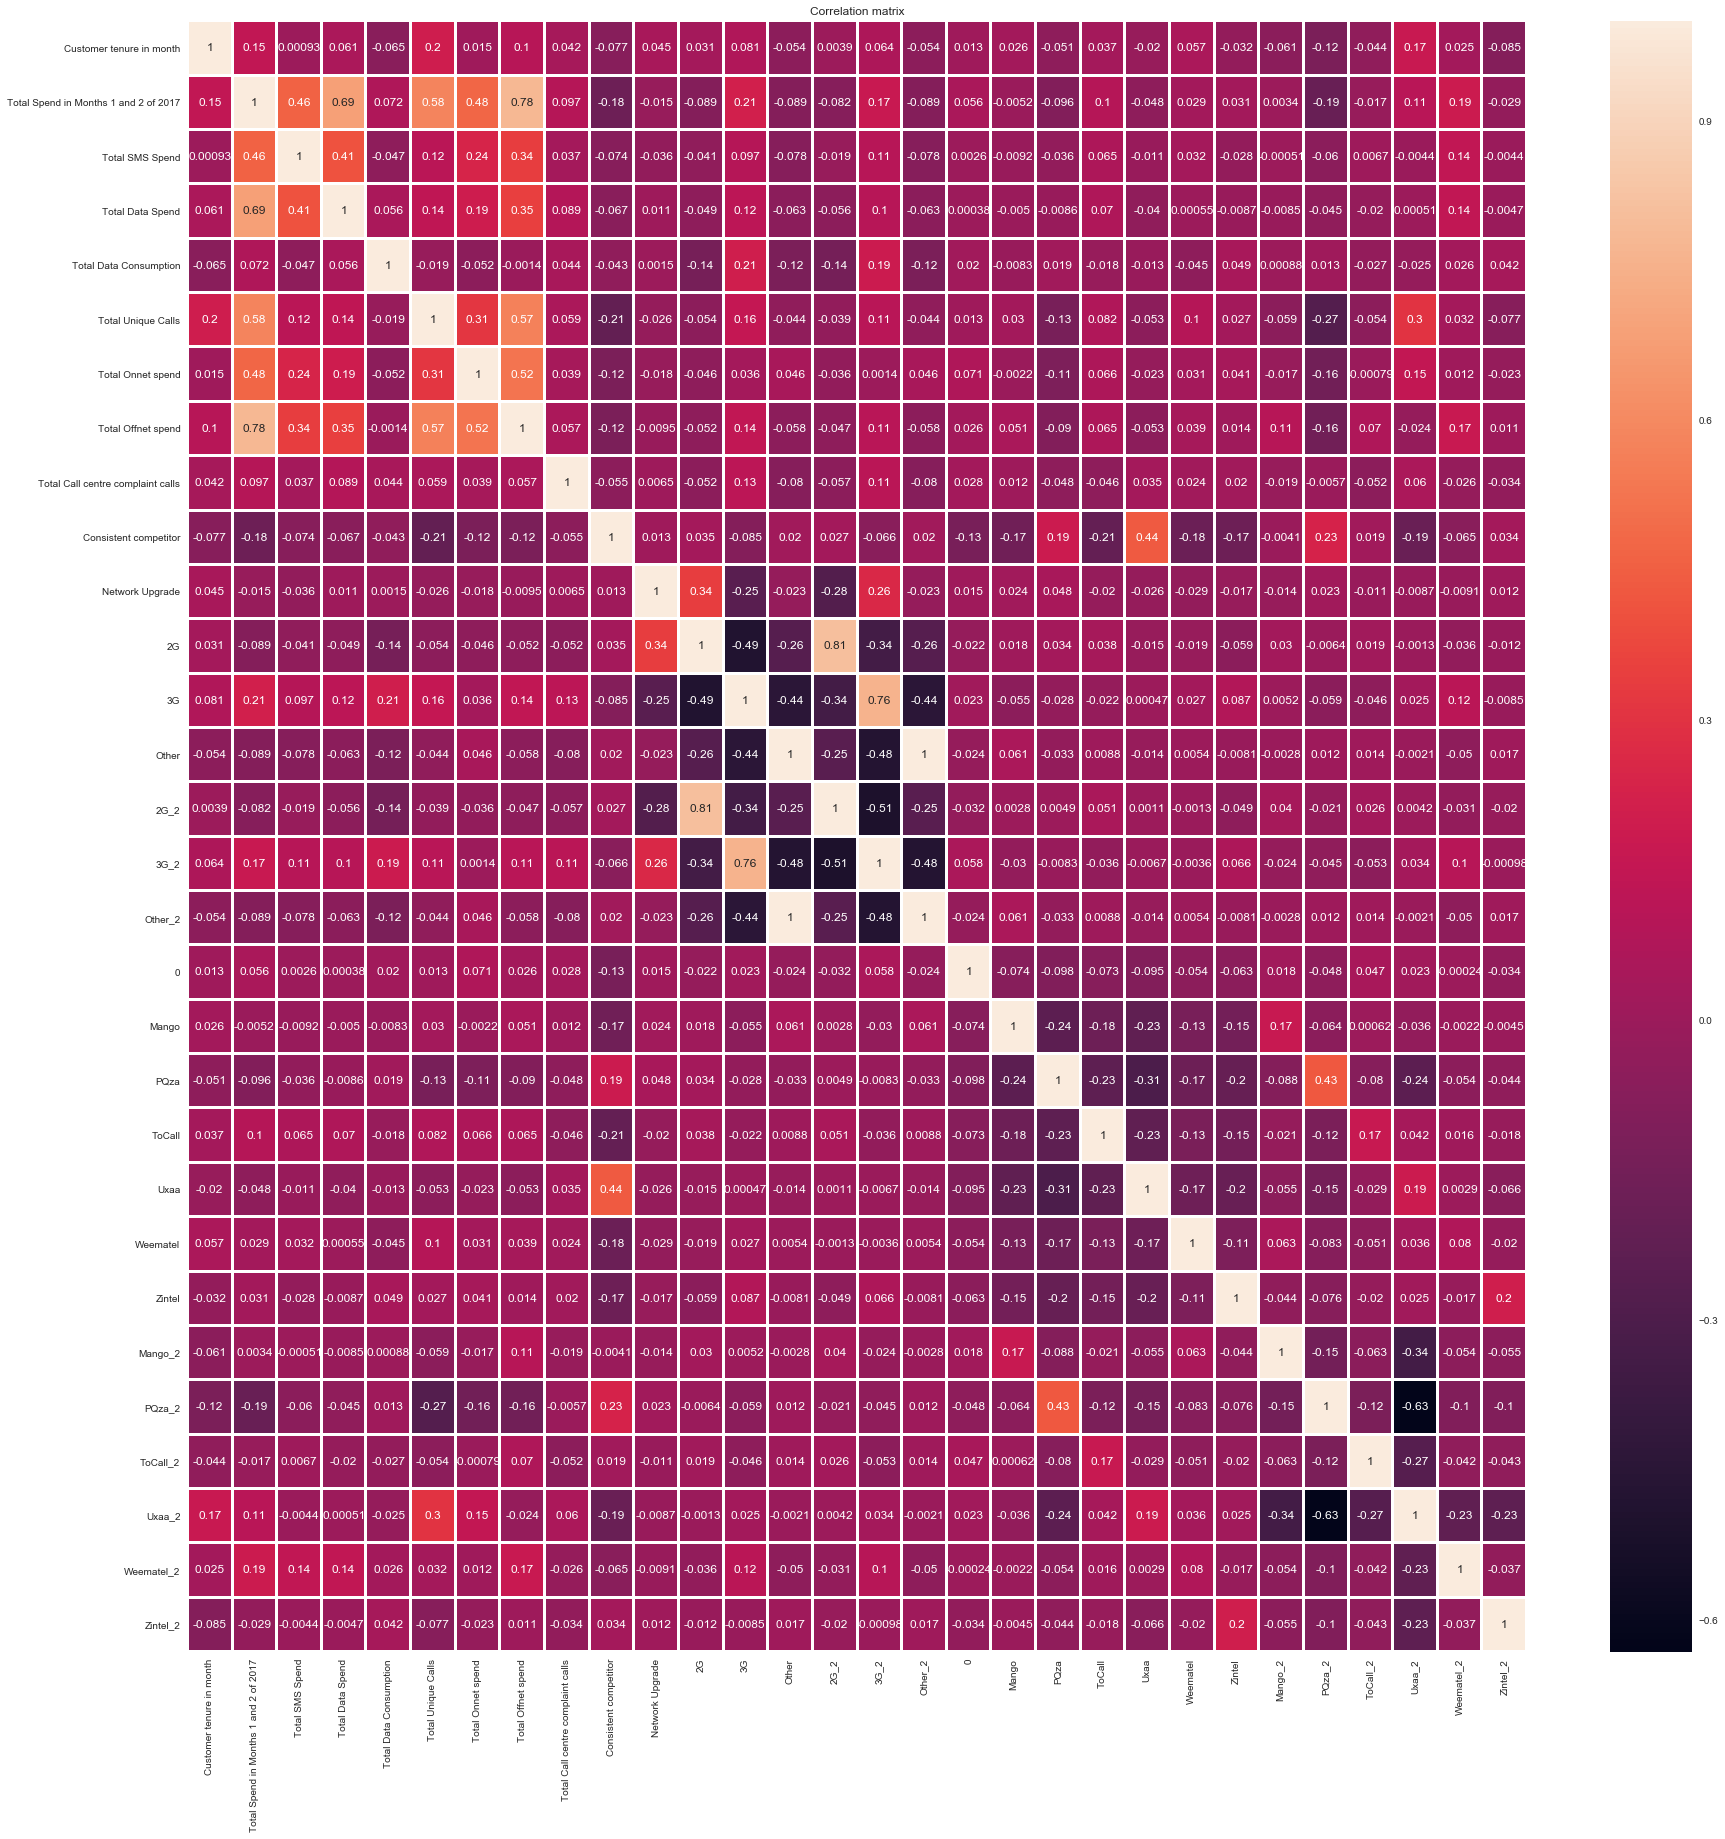

In [38]:
corr_matrix = train_x_std.corr()
f, ax = plt.subplots(figsize=[30,30])
sns.heatmap(corr_matrix, linewidths=2, ax=ax, annot=True)    # annot parameter sets the values.
#as you can see in heatmap, longitude are latitude
ax.set_title('Correlation matrix')

In [29]:
test_preds_qda = qda.predict(selected_test_std)
test_preds_qda[test_preds_qda < 0] = 0
d = {'Customer ID': test_data_ID, 'Churn Status': test_preds_qda}
test_df = pd.DataFrame(d)
test_df = test_df[['Customer ID', 'Churn Status']]
test_df.to_csv('Submission_qda.csv', index=False)